# Data Augmentation


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import transforms




from src.datasets import SatelliteImagesTrainDataset, train_test_split
from src.unet import UNet
from src.path import DATA_TRAIN_PATH, MODELS_DIR, extract_archives

from src.plot_utils import plot_image_mask
# from src.plot_utils import plot_image_mask


NUM_EPOCHS = 100
MODEL_PATH = os.path.join(MODELS_DIR, 'convnet_model.pth')

ImportError: cannot import name 'plot_image_mask' from 'src.plot_utils' (/home/lleguill/Documents/Cours_MA1/Machine_Learning/ml-project-2-qelbis/src/plot_utils.py)

In [3]:
dataset = SatelliteImagesTrainDataset(
        root_dir=DATA_TRAIN_PATH)

image, mask = dataset[5]
print('Image size:', image.shape)
print('Mask size:', mask.shape)
plot_image_mask(image, mask)

FileNotFoundError: [Errno 2] No such file or directory: '/home/lleguill/Documents/Cours_MA1/Machine_Learning/ml-project-2-qelbis/data/training/images'

# Augmentation

In [3]:
final_train_data =[];
final_target_data =[];
#original,
final_train_data.append(image)
final_train_data.append(rotate(image,angle=45,mode = 'wrap'))
final_train_data.append(np.fliplr(image))
final_train_data.append(np.flipud(image))
final_train_data.append(random_noise(image,var=0.2**2))
final_train_data.append(gaussian(image,sigma=1,multichannel=True))


final_train = np.array(final_train_data)
print(final_train.shape)

(6, 400, 400, 3)


(400, 400, 3)


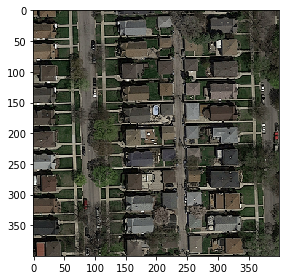

In [4]:
print(image.shape)
io.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


a
a
a
a
a


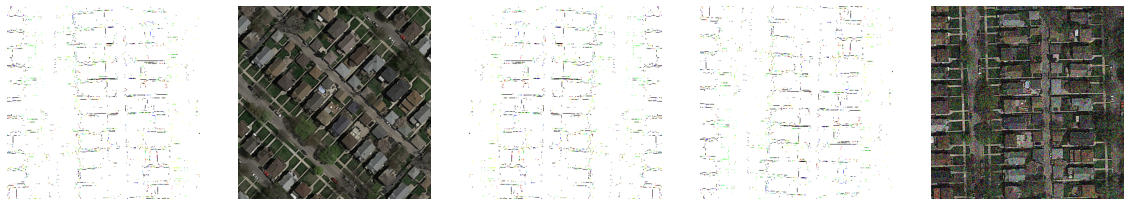

In [32]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i])
    ax[i].axis('off')
    print('a')

In [5]:
type(final_train[1])

numpy.ndarray

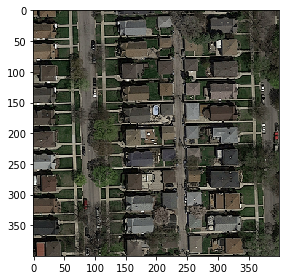

In [25]:
io.imshow(image)

In [22]:
from PIL import Image

In [35]:
image.shape

(400, 400, 3)

In [56]:
from src.path import DATA_DIR
AUGMENTED_IMAGES_DIR = os.path.join(DATA_DIR,'augmented/images')
AUGMENTED_GT_DIR = os.path.join(DATA_DIR,'augmented/groundtruth')

In [55]:
test = np.fliplr(image)

print(test.shape)


img = Image.fromarray(test, 'RGB')

img.save(f"{AUGMENTED_IMAGES_DIR}/test1.png")



(400, 400, 3)


In [57]:
type(dataset)

src.datasets.SatelliteImagesTrainDataset

In [62]:
for i in range(1):
    image, mask = dataset[i]
    print(i)
    

FileNotFoundError: No such file: '/home/lleguill/Documents/Cours_MA1/Machine_Learning/ml-project-2-qelbis/data/training/images/satImage_098.png'